## Preliminary data cleaning and standardization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(42)

In [3]:
# Load the dataset (adjust path as needed)
#df = pd.read_csv('/Users/nakuljoshi/Downloads/covtype.csv')
df = pd.read_csv('covtype.csv')

# Display basic info to understand the dataset
print("Initial dataset shape:", df.shape)

def clean_data(df):
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    # Drop columns with more than 30% missing values
    threshold = 0.3 * len(df)
    df = df.dropna(thresh=threshold, axis=1)
    
    # Fill remaining missing values with median
    df = df.fillna(df.median(numeric_only=True))
    
    # Remove irrelevant or non-informative features (adjust as needed)
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
    
    return df

# Clean the dataset
df_cleaned = clean_data(df)

# Display final shape
print("Final dataset shape:", df_cleaned.shape)
display(df.head())


Initial dataset shape: (581012, 55)
Final dataset shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Standardize features
df_std = df_cleaned.copy(deep=True)

# Standardize:
gradient_features =['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

# Convert from multi-class to K Boolean classifiers, -1/1:
categoric_features = ['Cover_Type']

# Convert from 0/1 to -1/1
binary_features = ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

In [6]:
# Preliminary statistics report
fmt = '{: >36} {: >24} {: >24} {: >24} {: >24}'
print(fmt.format(*['FEATURE', 'MIN', 'MAX', 'MEAN', 'STD']), '\n')

for ft, val in df_std.items():
    min, max, mean, std = df_std[ft].min(), df_std[ft].max(), df_std[ft].mean(), df_std[ft].std()
    print(fmt.format(*[ft, min, max, mean, std]))

                             FEATURE                      MIN                      MAX                     MEAN                      STD 

                           Elevation                     1859                     3858        2959.365300544567       279.98473425063816
                              Aspect                        0                      360       155.65680743254873       111.91372100329545
                               Slope                        0                       66       14.103703537964792        7.488241814480137
    Horizontal_Distance_To_Hydrology                        0                     1397       269.42821662891646       212.54935559508107
      Vertical_Distance_To_Hydrology                     -173                      601       46.418855376481034       58.295231626887244
     Horizontal_Distance_To_Roadways                        0                     7117       2350.1466114297123       1559.2548698976088
                       Hillshade_9am   

In [7]:
# Standardize gradient features. 
for ft in gradient_features:
    # 3.3: The standardized version of a vector is the according demeaned vector divided by the std, i.e. z-scores.
    old_mean, old_std = df_cleaned[ft].mean(), df_cleaned[ft].std()
    df_std[ft] = (df_cleaned[ft].sub(old_mean)).div(old_std)
    new_mean, new_std = df_std[ft].mean(), df_std[ft].std()

In [8]:
# Standardize categorical features.
for ft in categoric_features:
    # Add and fill columns 
    ft_min, ft_max = df_cleaned[ft].min().astype(object), df_cleaned[ft].max().astype(object)
    for i in range(ft_min, ft_max + 1):
        ft_type_i = ft + '_' + str(i)
        df_std[ft_type_i] = df_std.apply(lambda sample: 1 if sample[ft] == i else -1, axis=1)

# Drop original categorical columns
df_target = df_std["Cover_Type"]
for ft in categoric_features:
    df_std = df_std.drop(ft, axis=1)
    
display(df_std.head())
display(df_target.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,...,0,0,0,-1,-1,-1,-1,1,-1,-1
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,...,0,0,0,-1,-1,-1,-1,1,-1,-1
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,...,0,0,0,-1,1,-1,-1,-1,-1,-1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,...,0,0,0,-1,1,-1,-1,-1,-1,-1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,...,0,0,0,-1,-1,-1,-1,1,-1,-1


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [9]:
# Standardize binary features.
for ft in binary_features:
    # From 0/1 to -1/1
    df_std[ft] = (df_cleaned[ft].mul(2)).sub(1)

In [10]:
# Final statistics report
print(fmt.format(*['FEATURE', 'MIN', 'MAX', 'MEAN', 'STD']), '\n')
for ft, val in df_std.items():
    min, max, mean, std = df_std[ft].min(), df_std[ft].max(), df_std[ft].mean(), df_std[ft].std()
    print(fmt.format(*[ft, min, max, mean, std]))

                             FEATURE                      MIN                      MAX                     MEAN                      STD 

                           Elevation      -3.9300903439954573        3.209584629178348  -3.4437986545896505e-16                      1.0
                              Aspect       -1.390864373350299       1.8258993690454999   -5.909245418670878e-17                      1.0
                               Slope      -1.8834465936573024       6.9303713405304945    7.357206216623345e-17       0.9999999999999999
    Horizontal_Distance_To_Hydrology      -1.2676030744698796        5.304988011909919  -1.1192345627416364e-16       0.9999999999999999
      Vertical_Distance_To_Hydrology      -3.7639245827317285        9.513319171164113    3.345963465538808e-17       0.9999999999999999
     Horizontal_Distance_To_Roadways      -1.5072241599502194        3.057135482208442    2.034971932257521e-17       0.9999999999999999
                       Hillshade_9am   

## Linear Model on Original (Standardized) Dataset
Identify an initial linear model using cross-validation on the training set. The best model's parameters, RMS error, and confusion matrix on the testing set are reported.

In [11]:
# Dataset split
from sklearn.model_selection import train_test_split

cover_types = ['Cover_Type_1', 'Cover_Type_2', 'Cover_Type_3', 'Cover_Type_4', 'Cover_Type_5', 'Cover_Type_6', 'Cover_Type_7']
df_labels = df_std[cover_types]
df_data = df_std.drop(cover_types, axis=1)
display(df_labels.head())
display(df_data.head())

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, train_size=0.8, random_state=42)
display(X_train.shape, y_train.shape) # Should output (4a, 54), (4a, 7) for some a
display(X_test.shape, y_test.shape) # Should output (a, 54), (a, 7) for some a

,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,-1,-1,-1,-1,1,-1,-1
1,-1,-1,-1,-1,1,-1,-1
2,-1,1,-1,-1,-1,-1,-1
3,-1,1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,1,-1,-1


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


(464809, 54)

(464809, 7)

(116203, 54)

(116203, 7)

In [12]:
# Basic linear model using cross-validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

linear_model = LinearRegression()
linear_results = []

for cover_type in cover_types:
  linear_results.append(cross_validate(linear_model, X_train, y_train[cover_type], cv=10, return_estimator=True))

for result in linear_results:
  print("Test scores: ", result['test_score'])

Test scores:  [0.30730323 0.30665445 0.31388488 0.30861683 0.30961371 0.31411736
 0.31578716 0.31080157 0.31210093 0.31133813]
Test scores:  [0.29234144 0.2975622  0.30052653 0.29882324 0.29663527 0.30446341
 0.30426909 0.3037042  0.30501669 0.29780577]
Test scores:  [0.51086434 0.51941613 0.51570332 0.51804033 0.51666261 0.53063533
 0.51389517 0.51530065 0.51446228 0.51912175]
Test scores:  [0.16638552 0.16995148 0.1686421  0.18265496 0.20606311 0.15689985
 0.18992053 0.17402643 0.18042599 0.16421237]
Test scores:  [0.05248849 0.05459709 0.05685259 0.04973188 0.05173197 0.05228515
 0.05069406 0.0541846  0.057495   0.04871575]
Test scores:  [0.20895137 0.21724279 0.21417869 0.2088615  0.20213522 0.20394067
 0.20761911 0.21843943 0.21349492 0.20065925]
Test scores:  [0.35343755 0.35639629 0.36679906 0.36123267 0.37762125 0.37439576
 0.34431233 0.36127735 0.35686788 0.36018971]


In [13]:
# Obtain best linear model 
best_scores = []
for result in linear_results:
  best_scores.append(np.argmax(result['test_score']).astype(object))

y_pred = []
model_ct = len(cover_types)
for i in range(model_ct):
  best_fit_i = linear_results[i]['estimator'][best_scores[i]]
  print("Intercept, [Coefficients] for cover type", i + 1)
  print(best_fit_i.intercept_, best_fit_i.coef_, '\n')
  y_pred.append(best_fit_i.predict(X_test))

Intercept, [Coefficients] for cover type 1
-0.24281025684003704 [ 0.66231516 -0.0133228  -0.01888909 -0.10442953 -0.03303806 -0.06174853
  0.04214329 -0.18992285  0.14401251 -0.0138375   0.03164833 -0.14049141
 -0.09466723  0.20351031  0.28657178  0.17271992  0.22281271  0.13859202
  0.25009481  0.04074923 -0.27444254 -0.06081803  0.11648287  0.05290612
  0.03431315 -0.12358977 -0.04690543  0.2468855   0.27063669  0.04982762
  0.11743191  0.08676249  0.1135338   0.11908316  0.45379792  0.19968838
  0.13402959  0.08458132 -0.21468171 -0.03990341  0.13742509 -0.00883422
 -0.07784798 -0.10368455  0.07024636 -0.02205311  0.04703018 -0.15701192
 -0.3006895  -0.42979071 -0.94471324 -0.17472835 -0.18396122 -0.28254693] 

Intercept, [Coefficients] for cover type 2
-0.44071326206707867 [-0.58355163 -0.01007054  0.04477034  0.11540965  0.01392177  0.06284739
  0.04575635  0.14315502  0.00278536  0.01181536  0.17365246  0.26049666
  0.1455535  -0.57970262 -0.4384303  -0.58190372 -0.38050511 -0.47

In [14]:
# Obtain results
from sklearn.metrics import mean_squared_error

total_RMS = 0
for i, cover_type in enumerate(cover_types):
    mse = mean_squared_error(y_test[cover_type], y_pred[i])
    total_RMS = total_RMS + mse
    print("RMS of", cover_type, "is", mse ** 0.5)

print("\nOveral RMS is", total_RMS ** 0.5)

RMS of Cover_Type_1 is 0.7978065224424369
RMS of Cover_Type_2 is 0.8377479188372484
RMS of Cover_Type_3 is 0.3340892066475494
RMS of Cover_Type_4 is 0.12280843759655219
RMS of Cover_Type_5 is 0.2529521340502182
RMS of Cover_Type_6 is 0.3037530639459007
RMS of Cover_Type_7 is 0.29394603699736027

Overal RMS is 1.3067782182737306


Confirm that we have the right number of predictions: (116203, 7) 

Accuracy: 70.1135 %

Confusion matrix display axes' tick-marks are off by 1.


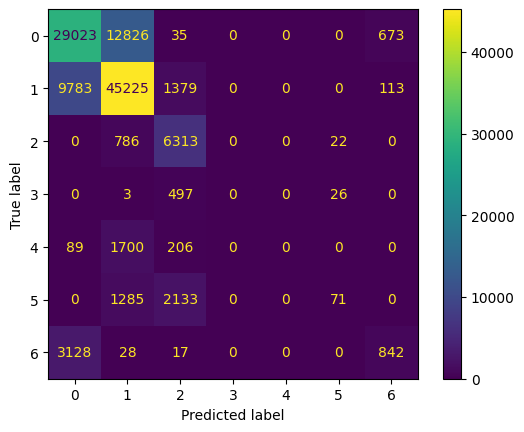

In [15]:
# Report on confusion matrix for classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtain classification of test set
y_test_class = y_test.idxmax(axis=1).str.strip().str[-1].astype(int)

# Obtain classification of predictions
y_pred_T = np.transpose(y_pred)
print("Confirm that we have the right number of predictions:", y_pred_T.shape, '\n')

y_pred_class = []
for pred in y_pred_T:
    y_pred_class.append(np.argmax(pred).astype(object) + 1)

print("Accuracy:", 100 * round(accuracy_score(y_test_class, y_pred_class), 6), '%\n')
print("Confusion matrix display axes' tick-marks are off by 1.")
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Feature Engineering and New Linear Model
Identify linear models for particular feature mappings using cross-validation on the training set. The best model's parameters, RMS error, and confusion matrix on the testing set are reported.

In [16]:
'''
We will extract the following new features (20):
    - Climatic_Zone_(2, 3, 4, 5, 6, 7, 8)
        -- Based on soil type. For more information, see convtype.info.
        -- 2: [1, 2, 3, 4, 5, 6]
        -- 3: [7, 8]
        -- 4: [9, 10, 11, 12, 13]
        -- 5: [14, 15]
        -- 6: [16, 17, 18]
        -- 7: [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
        -- 8: [35, 36, 37, 38, 39, 40]
    - Geologic_Zone_(1, 2, 5, 7)
        -- Based on soil type. For more information, see convtype.info.
        -- 1: [14, 15, 16, 17, 19, 20, 21]
        -- 2: [9, 22, 23]
        -- 5: [7, 8]
        -- 7: [1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
    - Vertical_Position_To_Hydrology = sign(Vertical_Distance_To_Hydrology)

    - Sqrt and Square of all gradient features
    - Euclidean_Distance_To_Hydrology = [Horizontal_Distance_To_Hydrology ** 2 + Vertical_Distance_To_Hydrology ** 2] ** 0.5
    - Mean_Hillshade = [Hillshade_9am + Hillshade_3pm] / 2
        -- Previously, we found that Hillshade_9am and Hillshade_3pm have strong covariance.
    - Mean_Distance_Hydrology_Firepoints = [Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Fire_Points] / 2
    - Mean_Distance_Hydrology_Roadways = [Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways] / 2
    - Mean_Distance_Roadways_Firepoints = [Horizontal_Distance_To_Roadways + Horizontal_Distance_To_Fire_Points] / 2
    
'''

# Add new binary features
new_binary_features = ['Climatic_Zone_2', 'Climatic_Zone_3', 'Climatic_Zone_4', 'Climatic_Zone_5', 
                       'Climatic_Zone_6', 'Climatic_Zone_7', 'Climatic_Zone_8',
                       'Geologic_Zone_1', 'Geologic_Zone_2', 'Geologic_Zone_5', 'Geologic_Zone_7',
                       'Vertical_Position_To_Hydrology']

cz2 = ['Soil_Type' + str(k) for k in [1, 2, 3, 4, 5, 6]]
df_cleaned['Climatic_Zone_2'] = df_cleaned[cz2].sum(axis=1)
cz3 = ['Soil_Type' + str(k) for k in [7, 8]]
df_cleaned['Climatic_Zone_3'] = df_cleaned[cz3].sum(axis=1)
cz4 = ['Soil_Type' + str(k) for k in [9, 10, 11, 12, 13]]
df_cleaned['Climatic_Zone_4'] = df_cleaned[cz4].sum(axis=1)
cz5 = ['Soil_Type' + str(k) for k in [14, 15]]
df_cleaned['Climatic_Zone_5'] = df_cleaned[cz5].sum(axis=1)
cz6 = ['Soil_Type' + str(k) for k in [16, 17, 18]]
df_cleaned['Climatic_Zone_6'] = df_cleaned[cz6].sum(axis=1)
cz7 = ['Soil_Type' + str(k) for k in [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
df_cleaned['Climatic_Zone_7'] = df_cleaned[cz7].sum(axis=1)
cz8 = ['Soil_Type' + str(k) for k in [35, 36, 37, 38, 39, 40]]
df_cleaned['Climatic_Zone_8'] = df_cleaned[cz8].sum(axis=1)

gz1 = ['Soil_Type' + str(k) for k in [14, 15, 16, 17, 19, 20, 21]]
df_cleaned['Geologic_Zone_1'] = df_cleaned[gz1].sum(axis=1)
gz2 = ['Soil_Type' + str(k) for k in [9, 22, 23]]
df_cleaned['Geologic_Zone_2'] = df_cleaned[gz2].sum(axis=1)
gz5 = ['Soil_Type' + str(k) for k in [7, 8]]
df_cleaned['Geologic_Zone_5'] = df_cleaned[gz5].sum(axis=1)
gz7 = ['Soil_Type' + str(k) for k in [1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
df_cleaned['Geologic_Zone_7'] = df_cleaned[gz7].sum(axis=1)

df_cleaned['Vertical_Position_To_Hydrology'] = np.where(df_cleaned['Vertical_Distance_To_Hydrology'] < 0, 0, 1)

# Standardize new binary features.
for ft in new_binary_features:
    # From 0/1 to -1/1
    df_std[ft] = (df_cleaned[ft].mul(2)).sub(1)

# Add new gradient features
sqrt_gradient = ['Sqrt_' + k for k in gradient_features]
sqrd_gradient = ['Square_' + k for k in gradient_features]
new_gradient_features = sqrt_gradient + sqrd_gradient + ['Euclidean_Distance_To_Hydrology', 'Mean_Hillshade',
                        'Mean_Distance_Hydrology_Firepoints', 'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Roadways_Firepoints']

for ft in gradient_features:
    df_cleaned['Sqrt_' + ft] = df_cleaned[ft].abs().pow(0.5)
    df_cleaned['Square_' + ft] = df_cleaned[ft].pow(2)

df_cleaned['Euclidean_Distance_To_Hydrology'] = (df_cleaned['Horizontal_Distance_To_Hydrology'].pow(2) + df_cleaned['Vertical_Distance_To_Hydrology'].pow(2)).pow(0.5)
df_cleaned['Mean_Hillshade'] = (df_cleaned['Hillshade_9am'] + df_cleaned['Hillshade_3pm']).mul(0.5)
df_cleaned['Mean_Distance_Hydrology_Firepoints'] = (df_cleaned['Horizontal_Distance_To_Hydrology'] + df_cleaned['Horizontal_Distance_To_Fire_Points']).mul(0.5)
df_cleaned['Mean_Distance_Hydrology_Roadways'] = (df_cleaned['Horizontal_Distance_To_Hydrology'] + df_cleaned['Horizontal_Distance_To_Roadways']).mul(0.5)
df_cleaned['Mean_Distance_Roadways_Firepoints'] = (df_cleaned['Horizontal_Distance_To_Roadways'] + df_cleaned['Horizontal_Distance_To_Fire_Points']).mul(0.5)

# Standardize new gradient features. 
for ft in new_gradient_features:
    # 3.3: The standardized version of a vector is the according demeaned vector divided by the std, i.e. z-scores.
    old_mean, old_std = df_cleaned[ft].mean(), df_cleaned[ft].std()
    df_std[ft] = (df_cleaned[ft].sub(old_mean)).div(old_std)

In [17]:
# Statistics report of new standardized features.
print(fmt.format(*['FEATURE', 'MIN', 'MAX', 'MEAN', 'STD']), '\n')
for ft, val in df_std[new_binary_features + new_gradient_features].items():
    min, max, mean, std = df_std[ft].min(), df_std[ft].max(), df_std[ft].mean(), df_std[ft].std()
    print(fmt.format(*[ft, min, max, mean, std]))

                             FEATURE                      MIN                      MAX                     MEAN                      STD 

                     Climatic_Zone_2                       -1                        1       -0.876260731275774      0.48183765981466486
                     Climatic_Zone_3                       -1                        1      -0.9990223954066353      0.04420697727200918
                     Climatic_Zone_4                       -1                        1      -0.6778276524409135       0.7352214659182099
                     Climatic_Zone_5                       -1                        1      -0.9979277536436425       0.0643444297014575
                     Climatic_Zone_6                       -1                        1      -0.9718904256710704       0.2354338461008821
                     Climatic_Zone_7                       -1                        1       0.3837338987835019       0.9234445097685867
                     Climatic_Zone_8   

In [18]:
# Repeat what was done previously
df_labels = df_std[cover_types]
df_data = df_std.drop(cover_types, axis=1)
display(df_labels.head())
display(df_data.head())

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, train_size=0.8, random_state=42)
display(X_train.shape, y_train.shape) # Should output (4a, 54), (4a, 7) for some a
display(X_test.shape, y_test.shape) # Should output (a, 54), (a, 7) for some a

,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_4,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,-1,-1,-1,-1,1,-1,-1
1,-1,-1,-1,-1,1,-1,-1
2,-1,1,-1,-1,-1,-1,-1
3,-1,1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,1,-1,-1


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Square_Horizontal_Distance_To_Roadways,Square_Hillshade_9am,Square_Hillshade_Noon,Square_Hillshade_3pm,Square_Horizontal_Distance_To_Fire_Points,Euclidean_Distance_To_Hydrology,Mean_Hillshade,Mean_Distance_Hydrology_Firepoints,Mean_Distance_Hydrology_Roadways,Mean_Distance_Roadways_Firepoints
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,...,-0.816973,0.294964,0.422002,0.011617,4.272013,-0.083233,0.593525,3.171095,-1.165412,1.043223
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,...,-0.828441,0.253251,0.587985,0.095144,4.186547,-0.294777,0.676387,3.097129,-1.269896,0.969391
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,...,0.229126,0.854449,0.756101,-0.330964,4.024027,-0.001362,0.593525,3.061626,0.521425,2.109120
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,...,0.169210,1.033030,0.756101,-0.642070,4.164510,-0.031466,0.220648,3.108964,0.448412,2.109120
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,...,-0.828358,0.253251,0.532421,0.067115,4.103382,-0.566982,0.634956,3.014288,-1.306402,0.947326


(464809, 91)

(464809, 7)

(116203, 91)

(116203, 7)

In [19]:
# Linear model cross-validation
linear_results = []

for cover_type in cover_types:
  linear_results.append(cross_validate(linear_model, X_train, y_train[cover_type], cv=10, return_estimator=True))

for result in linear_results:
  print("Test scores: ", result['test_score'])

Test scores:  [0.32785521 0.32630297 0.33382797 0.32831825 0.33033012 0.33453004
 0.33421449 0.33171899 0.33209776 0.33206619]
Test scores:  [0.33118278 0.33400097 0.3364994  0.33611174 0.33380262 0.34003547
 0.33945946 0.34191767 0.3385038  0.33508979]
Test scores:  [0.52502823 0.53406121 0.53193217 0.53327984 0.53143728 0.54468481
 0.52955462 0.5320708  0.52923893 0.53465458]
Test scores:  [0.18642989 0.18484868 0.18168867 0.20374012 0.22287647 0.17347332
 0.21062726 0.19223279 0.20188902 0.18024146]
Test scores:  [0.06730684 0.07293592 0.07348044 0.06467698 0.06765598 0.06548711
 0.06448343 0.06927221 0.07241578 0.0630321 ]
Test scores:  [0.22209841 0.23168301 0.22588088 0.22070837 0.21411542 0.2194722
 0.22063563 0.23232973 0.22804985 0.21288042]
Test scores:  [0.38710161 0.38384068 0.39889198 0.39306906 0.40989931 0.40876955
 0.37604746 0.39016401 0.39028845 0.39200795]


In [69]:
# Obtain best linear model 
best_scores = []
for result in linear_results:
  best_scores.append(np.argmax(result['test_score']).astype(object))

y_pred = []
best_fit = []
model_ct = len(cover_types)
for i in range(model_ct):
  best_fit_i = linear_results[i]['estimator'][best_scores[i]]
  print("Intercept, [Coefficients] for cover type", i + 1)
  print(best_fit_i.intercept_, best_fit_i.coef_, '\n')
  y_pred.append(best_fit_i.predict(X_test))
  best_fit.append(best_fit_i)

Intercept, [Coefficients] for cover type 1
-0.29085845972999325 [ 4.40658455e+01 -3.67644161e-02 -1.40798528e-01  4.13716109e-01
  2.33078795e-02  4.46283804e-02  1.91590421e-01  2.53097755e-01
 -2.21271662e-01  2.46900911e-02  8.73608544e-02 -8.62988081e-02
 -6.32633557e-02  6.22013094e-02  2.30638276e-03  7.65677884e-02
  9.19186932e-02  4.45673811e-02 -4.98604508e-02  3.44531622e-02
 -1.47043034e-01  8.15711425e-02  1.38147927e-02  9.83329438e-02
  1.00036808e-01 -1.21379528e-01 -2.86257646e-02  4.60576520e-02
 -6.05712471e-02 -7.99191397e-02 -2.08396344e-02  1.34280236e-01
 -3.65580706e-02 -3.95942216e-02  2.68716087e-01  6.84182999e-02
 -1.66593487e-02  1.02876806e-01 -1.58903420e-01 -1.70601632e-02
  1.21621530e-01  8.77044451e-03 -6.89429763e-02 -7.69588410e-02
  6.20563898e-02 -2.75741534e-02  5.23048937e-02 -1.72599741e-01
  1.83486254e-02 -6.58920478e-02 -6.18835590e-01  1.62944488e-01
  1.45077658e-01  7.27751681e-02  1.99952957e-01 -6.54718912e-02
  6.21792511e-02 -1.451359

In [70]:
# Obtain results
total_RMS = 0
cover_mse = []
for i, cover_type in enumerate(cover_types):
    mse = mean_squared_error(y_test[cover_type], y_pred[i])
    cover_mse.append(mse)
    total_RMS = total_RMS + mse
    print("RMS of", cover_type, "is", mse ** 0.5)

print("\nOveral RMS is", total_RMS ** 0.5)

RMS of Cover_Type_1 is 0.7858231411396174
RMS of Cover_Type_2 is 0.8149714961040845
RMS of Cover_Type_3 is 0.32842040956816193
RMS of Cover_Type_4 is 0.12158684350344436
RMS of Cover_Type_5 is 0.25092448411383667
RMS of Cover_Type_6 is 0.30116061003020267
RMS of Cover_Type_7 is 0.2874329870683715

Overal RMS is 1.2808662718501571


Confirm that we have the right number of predictions: (116203, 7) 

Accuracy: 71.11 %

Confusion matrix display axes' tick-marks are off by 1.


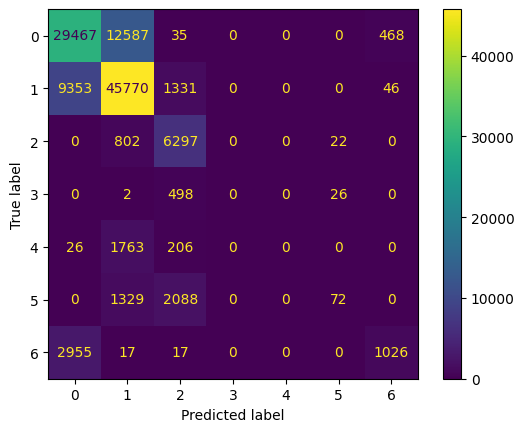

In [71]:
# Report on confusion matrix for classification

# Obtain classification of test set
y_test_class = y_test.idxmax(axis=1).str.strip().str[-1].astype(int)

# Obtain classification of predictions
y_pred_T = np.transpose(y_pred)
print("Confirm that we have the right number of predictions:", y_pred_T.shape, '\n')

y_pred_class = []
for pred in y_pred_T:
    y_pred_class.append(np.argmax(pred).astype(object) + 1)

print("Accuracy:", 100 * round(accuracy_score(y_test_class, y_pred_class), 6), '%\n')
print("Confusion matrix display axes' tick-marks are off by 1.")
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Regularization
Add regularization to the model from the previous part to reduce overfitting. The best regularization parameter, revised model parameters, RMS error, and confusion matrix.

In [72]:
# Current model
print(cover_mse)
print(best_fit)

[0.617518009150535, 0.6641785394621298, 0.10785996542091923, 0.014783360513131068, 0.06296309672779506, 0.09069771303376381, 0.08261772205504662]
[LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]


In [73]:
# 15.4 covers ridge regression, which penalizes the squares of the parameter magnitudes
from sklearn.linear_model import Ridge

# Lambdas to test
lambda_values = 50000 * 0.875 ** np.arange(1, 120)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# Cross-validation to find the optimal regularization parameter 
for i, cover_type in enumerate(cover_types):
    best_lambda = lambda_values[0]
    for lambda_val in lambda_values:
        lr_j = Ridge(alpha=lambda_val, random_state=42).fit(X_train_train, y_train_train[cover_type])
        y_pred_j = lr_j.predict(X_train_val)
        MSE_j = mean_squared_error(y_train_val[cover_type], y_pred_j)
        
        if MSE_j < cover_mse[i]:
            cover_mse[i] = MSE_j
            best_fit[i] = lr_j
            best_lambda = lambda_val

    if best_lambda == lambda_values[0]:
        lr_j = Ridge(alpha=best_lambda, random_state=42).fit(X_train_train, y_train_train[cover_type])
        y_pred_j = lr_j.predict(X_train_val)
        cover_mse[i] = mean_squared_error(y_train_val[cover_type], y_pred_j)
        best_fit[i] = lr_j
    
    rms = cover_mse[i] ** 0.5
    print('The best value of lambda for', cover_type, 'that could be found is', best_lambda, ', with an RMS error of', rms)

The best value of lambda for Cover_Type_1 that could be found is 0.018275273696391203 , with an RMS error of 0.7856729231793081
The best value of lambda for Cover_Type_2 that could be found is 0.00627954698087154 , with an RMS error of 0.812759918660114
The best value of lambda for Cover_Type_3 that could be found is 43750.0 , with an RMS error of 0.32842040956816193


KeyboardInterrupt: 

In [58]:
# Obtain best linear model 
y_pred = []
model_ct = len(cover_types)
for i in range(model_ct):
  best_fit_i = best_fit[i]
  print("Intercept, [Coefficients] for cover type", i + 1)
  print(best_fit_i.intercept_, best_fit_i.coef_, '\n')
  y_pred.append(best_fit_i.predict(X_test))

Intercept, [Coefficients] for cover type 1
-0.28736074928224165 [ 4.32909521e+01 -9.12786166e-02 -1.02328439e-01  3.67366223e-01
  2.29591147e-02  5.95631995e-02  2.88495233e-01  3.18293927e-01
 -2.51892263e-01  2.16174453e-02  8.73492655e-02 -8.64003681e-02
 -6.41784987e-02  6.32278229e-02  2.34839807e-03  7.66004216e-02
  8.94378772e-02  4.34408468e-02 -4.44728686e-02  3.32514109e-02
 -1.53666969e-01  8.80519424e-02  6.93667263e-03  1.01131765e-01
  1.00707209e-01 -1.19671156e-01 -2.76510681e-02  4.46120870e-02
 -6.10674969e-02 -7.65800890e-02 -2.43652272e-02  1.35112640e-01
 -3.39088539e-02 -4.14813906e-02  2.74311247e-01  7.01299928e-02
 -1.31596209e-02  1.06761291e-01 -1.84868145e-01 -2.12163591e-02
  1.17524322e-01  9.14166710e-03 -6.53864191e-02 -7.53582473e-02
  6.51707722e-02 -2.33861827e-02  5.57550021e-02 -1.71491703e-01
  1.85495247e-02 -5.47269432e-02 -6.27346317e-01  1.61582155e-01
  1.46026098e-01  7.32215254e-02  2.00606167e-01 -6.56150261e-02
  6.14533526e-02 -1.645541

In [59]:
# Obtain results
total_RMS = 0
for i, cover_type in enumerate(cover_types):
    mse = mean_squared_error(y_test[cover_type], y_pred[i])
    total_RMS = total_RMS + mse
    print("RMS of", cover_type, "is", mse ** 0.5)

print("\nOverall RMS is", total_RMS ** 0.5)

RMS of Cover_Type_1 is 0.7858406276210224
RMS of Cover_Type_2 is 0.8149791855913036
RMS of Cover_Type_3 is 0.32842040956816193
RMS of Cover_Type_4 is 0.12158684350344436
RMS of Cover_Type_5 is 0.2509244085496927
RMS of Cover_Type_6 is 0.30118320158501327
RMS of Cover_Type_7 is 0.2874329870683715

Overall RMS is 1.28088718967713


Confirm that we have the right number of predictions: (116203, 7) 

Accuracy: 71.0963 %

Confusion matrix display axes' tick-marks are off by 1.


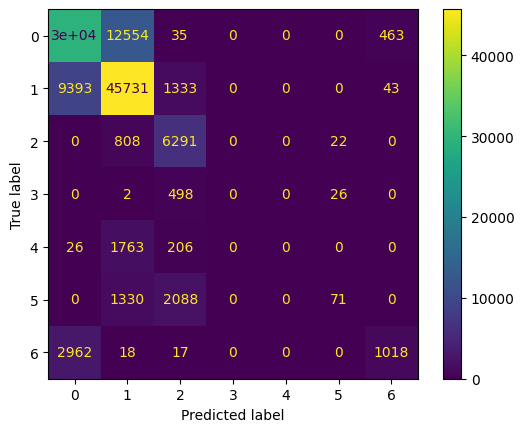

In [60]:
# Report on confusion matrix for classification

# Obtain classification of test set
y_test_class = y_test.idxmax(axis=1).str.strip().str[-1].astype(int)

# Obtain classification of predictions
y_pred_T = np.transpose(y_pred)
print("Confirm that we have the right number of predictions:", y_pred_T.shape, '\n')

y_pred_class = []
for pred in y_pred_T:
    y_pred_class.append(np.argmax(pred).astype(object) + 1)

print("Accuracy:", 100 * round(accuracy_score(y_test_class, y_pred_class), 6), '%\n')
print("Confusion matrix display axes' tick-marks are off by 1.")
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Nonlinear Data Fitting